In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal
import time

In [7]:
df = pd.read_csv('temperature.csv')
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


#### 1. Why is this called "exponential"? (Try writing out what the first few terms work out to be)


#### Exponential smoothing is named from the way this method works on the data. While smoothing data this method assigns exponentially decreasing weight as the observations get older.  Recent observations are given more weight.

#### 2. What happens if you make the "factor" in the code much smaller? Try .01, .001.


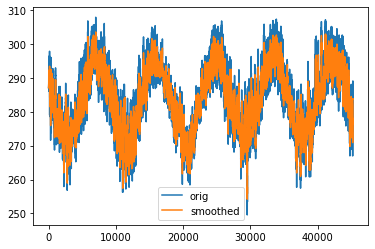

In [39]:
smoothed_boston = np.zeros(len(df)-1)

factor = 0.1

for k in range(len(df)-1):
    if k == 0:
        smoothed_boston[k]=df.iloc[1]['Boston']
    else:
        current_data = df.iloc[k]['Boston']
        if np.isnan(current_data):
            smoothed_boston[k]=smoothed_boston[k-1]
        else:
            smoothed_boston[k] = (1-factor)*smoothed_boston[k-1] + factor*current_data
        
plt.plot(df['Boston'], label='orig')
plt.plot(smoothed_boston, label='smoothed')
plt.legend()

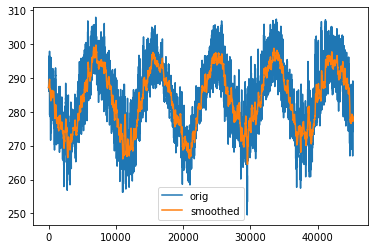

In [40]:
smoothed_boston = np.zeros(len(df)-1)

factor = 0.01

for k in range(len(df)-1):
    if k == 0:
        smoothed_boston[k]=df.iloc[1]['Boston']
    else:
        current_data = df.iloc[k]['Boston']
        if np.isnan(current_data):
            smoothed_boston[k]=smoothed_boston[k-1]
        else:
            smoothed_boston[k] = (1-factor)*smoothed_boston[k-1] + factor*current_data
        
plt.plot(df['Boston'], label='orig')
plt.plot(smoothed_boston, label='smoothed')
plt.legend()

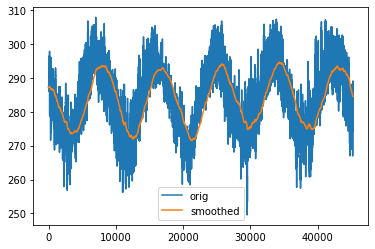

In [41]:
smoothed_boston = np.zeros(len(df)-1)

factor = 0.001

for k in range(len(df)-1):
    if k == 0:
        smoothed_boston[k]=df.iloc[1]['Boston']
    else:
        current_data = df.iloc[k]['Boston']
        if np.isnan(current_data):
            smoothed_boston[k]=smoothed_boston[k-1]
        else:
            smoothed_boston[k] = (1-factor)*smoothed_boston[k-1] + factor*current_data
        
plt.plot(df['Boston'], label='orig')
plt.plot(smoothed_boston, label='smoothed')
plt.legend()

### With decrease in the factor the noise is reducing and smoothining the curve.

#### 3. Do you expect this to be faster or slower than implementing a rolling average?

#### While caluclating the perf_counter it is observed that the rolling average takes much less time when compared to exponential smoothing.

#### 4. Try running the two methods - you can even use the time module to measure performance. Which method is faster?

In [42]:
time_start=time.perf_counter()

for k in range(len(df)-1):
    if k == 0:
        smoothed_boston[k]=df.iloc[1]['Boston']
    else:
        current_data = df.iloc[k]['Boston']
        if np.isnan(current_data):
            smoothed_boston[k]=smoothed_boston[k-1]
        else:
            smoothed_boston[k] = (1-factor)*smoothed_boston[k-1] + factor*current_data

time_end=time.perf_counter()
time_diff=time_end-time_start
print("Time taken for rolling avg:",time_diff)

Time taken for rolling avg: 5.402726874999644


In [43]:
time_start2=time.perf_counter()
df['Boston'].rolling(100).mean()
time_end2=time.perf_counter()
time_diff2=time_end2-time_start2
print("Time taken for rolling avg:",time_diff2)

Time taken for rolling avg: 0.008070543000940233


#### 5.In applications where you want to smooth data as it arrives in real time, it's very common to use exponential smoothing instead of a rolling average - why do you think this might be?

#### Exponential smoothing is mainly used to forecase future data while the data is time series. If we have a clear pattern we can use rolling average but if we dont have a clear time series pattern we use exponential smoothing. In real time not all the time the data is perfect and using exponential is apt. Where in exponential, recent observations are given more weigh than the older observations while calculating future forecast. Rolling average weightage is given equally for all the data.
